In [2]:
import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point
from geopandas import GeoDataFrame
import os

import seaborn as sns
pd.set_option("display.max_colwidth", 0)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.options.display.float_format = '{:.5f}'.format

import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import logging
import datetime

nblog = open("./logs/explore_localness_"+str(datetime.datetime.now())+".log", "a+")
sys.stdout.echo = nblog
sys.stderr.echo = nblog

get_ipython().log.handlers[0].stream = nblog
get_ipython().log.setLevel(logging.INFO)

%autosave 5

Autosaving every 5 seconds


In [4]:
%%time
df_localness = pd.read_csv('./data/food_localness_final_oct.csv')
print('unique orders:',df_localness.shape[0])
print('unique accounts:',df_localness.account_id.unique().shape[0])
df_localness.head(2)

unique orders: 2767286
unique accounts: 555121
CPU times: user 27.6 s, sys: 4.19 s, total: 31.8 s
Wall time: 41.4 s


,account_id,order_id,order_date,order_time,vendor_id,vendor_name,main_cuisine,vertical,delivery_fee_amount_lc,service_fee_amount_lc,basket_amount_lc,is_incentive_applied,incentive_amount_lc,pickup_id,customer_lon,customer_lat,vendor_lon,vendor_lat,order_time_hour,delivery_duration,total_duration,node_id,nearest_dist1,poi1,n_vertical,n_vendor_id,n_main_cuisine,n_vendor_name,n_vendor_lon,n_vendor_lat,vendor_index,pandana_distance_realdist,pandana_localness,speed,isweekend,item_price,customer_loc_id,entropy_0.5km,poi_count_0.5km,entropy_1km,poi_count_1km,entropy_2km,poi_count_2km,entropy_3km,poi_count_3km,entropy_4km,poi_count_4km,entropy_5km,poi_count_5km,poi_count_0.5_1km,poi_count_1_2km,poi_count_2_3km,poi_count_3_4km,poi_count_4_5km,approxi_rent,compensation,discounted delivery,free delivery,gem,item discount,menu discount,voucher wallet,incentives_type,incentive_delivery,incentive_menu_discount,incentive_voucher_wallet,rating,n_rating,total_orders,consistency
0,7051337,1305576462,2023-10-10,2023-10-10 15:30:22,50868,"SHAGHF, Jumeirah 3",coffee,food,0.00000,1.73000,57.75000,True,10.00000,249162013.00000,55.21388,25.15585,55.23119,25.18903,15,17,27,7584090309,0.65335,840,food,697762,coffee,"Awaken Cafe, Al Wasl",55.21303,25.15146,840,4.61410,0.14160,10.25355,False,30.06471,55.21387725.155851,0.00000,0.00000,0.47137,21.00000,0.65855,105.00000,0.66518,198.00000,0.69070,296.00000,0.70457,582.00000,21.00000,84.00000,93.00000,98.00000,286.00000,90.44289,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,voucher wallet,False,False,True,Amazing,None,58,0.85783
1,7051337,1313167366,2023-10-16,2023-10-16 16:43:34,50868,"SHAGHF, Jumeirah 3",coffee,food,7.50000,0.90000,26.25000,True,10.00000,250948408.00000,55.21389,25.15572,55.23119,25.18903,16,13,31,7584090309,0.65335,840,food,697762,coffee,"Awaken Cafe, Al Wasl",55.21303,25.15146,840,4.61410,0.14160,8.93051,False,30.06471,55.213885121047525.1557155663109,0.00000,0.00000,0.47137,21.00000,0.65855,105.00000,0.66603,197.00000,0.69169,295.00000,0.70585,587.00000,21.00000,84.00000,92.00000,98.00000,292.00000,90.65273,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,voucher wallet,False,False,True,Amazing,None,58,0.85783


# Distribution of localness

count   2767286.00000
mean    5.64142      
std     4.06497      
min     0.00000      
25%     2.46965      
50%     4.74689      
75%     7.98022      
max     46.27318     
Name: pandana_distance_realdist, dtype: float64


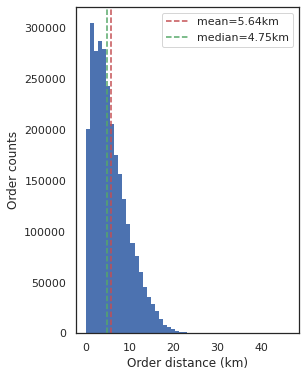

In [26]:
sns.set_theme(rc={'figure.figsize':(4,6)},style='white') 
plt.rcParams.update({'font.size': 14})
print(df_localness['pandana_distance_realdist'].describe())
ax = df_localness['pandana_distance_realdist'].hist(bins=50,ec='None')
ax.grid(False)
# plt.title('Food order distance (km) (n='+str(df_nearest_compute.shape[0])+')')
meanv = round(df_localness['pandana_distance_realdist'].mean(),2)
medianv = round(df_localness['pandana_distance_realdist'].median(),2)
plt.axvline(x=meanv,color='r',label='mean='+str(meanv)+'km',ls='--')
plt.axvline(x=medianv,color='g',label='median='+str(medianv)+'km',ls='--')
plt.ylabel('Order counts')
plt.xlabel('Order distance (km)')
plt.legend()
plt.savefig('./output/plot_orderdistance.pdf', bbox_inches="tight")

count    2767286.000000
mean     0.335338      
std      0.305679      
min      0.000000      
25%      0.093791      
50%      0.228303      
75%      0.503491      
max      1.000000      
Name: pandana_localness, dtype: object


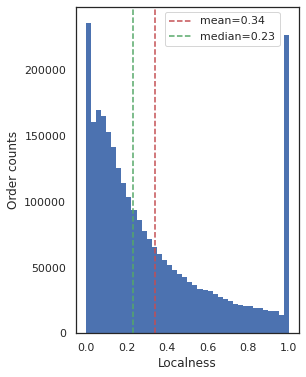

In [27]:
sns.set_theme(rc={'figure.figsize':(4,6)},style='white') 
plt.rcParams.update({'font.size': 14})
print(df_localness['pandana_localness'].describe().apply(lambda x: format(x, 'f')))
ax = df_localness['pandana_localness'].hist(bins=40,ec='None')
ax.grid(False)
meanv = round(df_localness['pandana_localness'].mean(),2)
medianv = round(df_localness['pandana_localness'].median(),2)
plt.axvline(x=meanv,color='r',label='mean='+str(meanv),ls='--')
plt.axvline(x=medianv,color='g',label='median='+str(medianv),ls='--')
plt.legend(loc=(0.4,0.88)) #loc=(0.4,0.85)
# plt.title('Food order localness (n='+str(df_nearest_compute.shape[0])+')')
plt.ylabel('Order counts')
plt.xlabel('Localness')
plt.savefig('./output/plot_localness.pdf', bbox_inches="tight")

count   2767286.00000
mean    1.48126      
std     1.82575      
min     0.00000      
25%     0.41558      
50%     0.90672      
75%     1.82404      
max     27.19515     
Name: nearest_dist1, dtype: float64


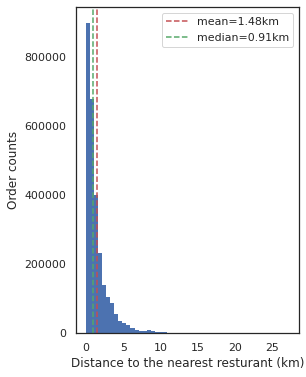

In [9]:
sns.set_theme(rc={'figure.figsize':(4,6)},style='white') 
plt.rcParams.update({'font.size': 14})
print(df_localness['nearest_dist1'].describe())
ax = df_localness['nearest_dist1'].hist(bins=50,ec='None')
ax.grid(False)
# plt.title('Food order distance (km) (n='+str(df_nearest_compute.shape[0])+')')
meanv = round(df_localness['nearest_dist1'].mean(),2)
medianv = round(df_localness['nearest_dist1'].median(),2)
plt.axvline(x=meanv,color='r',label='mean='+str(meanv)+'km',ls='--')
plt.axvline(x=medianv,color='g',label='median='+str(medianv)+'km',ls='--')
plt.ylabel('Order counts')
plt.xlabel('Distance to the nearest resturant (km)')
plt.legend()
plt.savefig('./output/plot_distance_to_nearest.pdf', bbox_inches="tight")

In [21]:
top10 = df_localness.groupby('main_cuisine').pandana_localness.mean().sort_values(ascending=False).head(10).index.tolist()
tail20 = df_localness.groupby('main_cuisine').pandana_localness.mean().sort_values(ascending=False).tail(20).index.tolist()

CPU times: user 2.37 s, sys: 1.32 s, total: 3.69 s
Wall time: 6.62 s


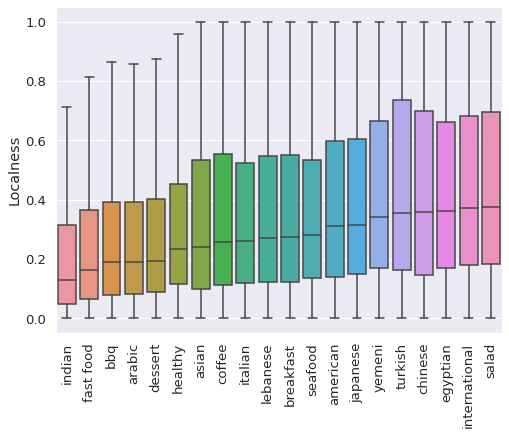

In [41]:
%%time
df_localness_select10 = df_localness[df_localness['main_cuisine'].isin(tail20)]
sns.set_theme(rc={'figure.figsize':(8,6)},font_scale=1.2)
# sns.violinplot(data=df_nearest_compute,x='main_cuisine',y='localness')
my_order = df_localness_select10.groupby(by=["main_cuisine"])["pandana_localness"].median().sort_values().index
sns.boxplot(data=df_localness_select10,x='main_cuisine',y='pandana_localness',order=my_order, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Localness')
plt.savefig('./output/plot_tenleastlocalcusines.pdf', bbox_inches="tight")

# Time of day pattern of food order localness

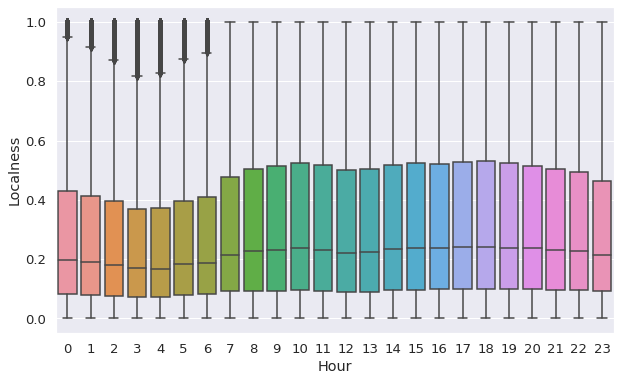

In [38]:
sns.set_theme(rc={'figure.figsize':(10,6)},font_scale=1.2)
sns.boxplot(data=df_localness,x='order_time_hour',y='pandana_localness')
# plt.xticks() # rotation=90
plt.xlabel('Hour')
plt.ylabel('Localness')
plt.savefig('./output/plot_localness_timeofday.pdf', bbox_inches="tight")

Text(0, 0.5, 'Order distance (km)')

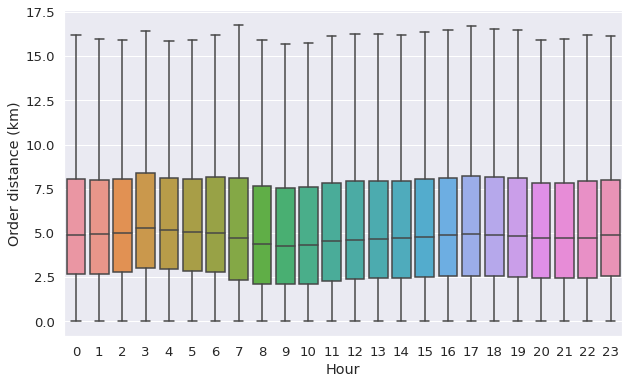

In [39]:
sns.set_theme(rc={'figure.figsize':(10,6)},font_scale=1.2)
sns.boxplot(data=df_localness,x='order_time_hour',y='pandana_distance_realdist', showfliers=False)
# plt.title('Order travel distance (km)')
plt.xlabel('Hour')
plt.ylabel('Order distance (km)')

# Total distance change if all orders were from the nearest restaurant

In [5]:
df_localness.head(2)

,account_id,order_id,order_date,order_time,vendor_id,vendor_name,main_cuisine,vertical,delivery_fee_amount_lc,service_fee_amount_lc,basket_amount_lc,is_incentive_applied,incentive_amount_lc,pickup_id,customer_lon,customer_lat,vendor_lon,vendor_lat,order_time_hour,delivery_duration,total_duration,node_id,nearest_dist1,poi1,n_vertical,n_vendor_id,n_main_cuisine,n_vendor_name,n_vendor_lon,n_vendor_lat,vendor_index,pandana_distance_realdist,pandana_localness,speed,isweekend,item_price,customer_loc_id,entropy_0.5km,poi_count_0.5km,entropy_1km,poi_count_1km,entropy_2km,poi_count_2km,entropy_3km,poi_count_3km,entropy_4km,poi_count_4km,entropy_5km,poi_count_5km,poi_count_0.5_1km,poi_count_1_2km,poi_count_2_3km,poi_count_3_4km,poi_count_4_5km,approxi_rent,compensation,discounted delivery,free delivery,gem,item discount,menu discount,voucher wallet,incentives_type,incentive_delivery,incentive_menu_discount,incentive_voucher_wallet,rating,n_rating,total_orders,consistency
0,7051337,1305576462,2023-10-10,2023-10-10 15:30:22,50868,"SHAGHF, Jumeirah 3",coffee,food,0.00000,1.73000,57.75000,True,10.00000,249162013.00000,55.21388,25.15585,55.23119,25.18903,15,17,27,7584090309,0.65335,840,food,697762,coffee,"Awaken Cafe, Al Wasl",55.21303,25.15146,840,4.61410,0.14160,10.25355,False,30.06471,55.21387725.155851,0.00000,0.00000,0.47137,21.00000,0.65855,105.00000,0.66518,198.00000,0.69070,296.00000,0.70457,582.00000,21.00000,84.00000,93.00000,98.00000,286.00000,90.44289,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,voucher wallet,False,False,True,Amazing,None,58,0.85783
1,7051337,1313167366,2023-10-16,2023-10-16 16:43:34,50868,"SHAGHF, Jumeirah 3",coffee,food,7.50000,0.90000,26.25000,True,10.00000,250948408.00000,55.21389,25.15572,55.23119,25.18903,16,13,31,7584090309,0.65335,840,food,697762,coffee,"Awaken Cafe, Al Wasl",55.21303,25.15146,840,4.61410,0.14160,8.93051,False,30.06471,55.213885121047525.1557155663109,0.00000,0.00000,0.47137,21.00000,0.65855,105.00000,0.66603,197.00000,0.69169,295.00000,0.70585,587.00000,21.00000,84.00000,92.00000,98.00000,292.00000,90.65273,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,voucher wallet,False,False,True,Amazing,None,58,0.85783


In [17]:
df_localness.order_id.unique().shape[0]

2767286

In [10]:
df_localness.pandana_distance_realdist.sum()

15611414.047119008

In [18]:
15611414.047119008/2767286

5.641416914304849

In [11]:
df_localness.nearest_dist1.sum()

4099066.5244400194

In [13]:
round((4099066.5244400194-15611414.047119008)/15611414.047119008*100,2)

-73.74

# OLS

In [4]:
import statsmodels.api as sm

In [5]:
df_localness.columns

Index(['account_id', 'order_id', 'order_date', 'order_time', 'vendor_id', 'vendor_name', 'main_cuisine', 'vertical', 'delivery_fee_amount_lc', 'service_fee_amount_lc', 'basket_amount_lc', 'is_incentive_applied', 'incentive_amount_lc', 'pickup_id', 'customer_lon', 'customer_lat', 'vendor_lon', 'vendor_lat', 'order_time_hour', 'delivery_duration', 'total_duration', 'node_id', 'nearest_dist1', 'poi1', 'n_vertical', 'n_vendor_id', 'n_main_cuisine', 'n_vendor_name', 'n_vendor_lon', 'n_vendor_lat', 'vendor_index', 'pandana_distance_realdist', 'pandana_localness', 'speed', 'isweekend', 'item_price', 'customer_loc_id', 'entropy_0.5km', 'poi_count_0.5km', 'entropy_1km', 'poi_count_1km', 'entropy_2km', 'poi_count_2km', 'entropy_3km', 'poi_count_3km', 'entropy_4km', 'poi_count_4km', 'entropy_5km', 'poi_count_5km', 'poi_count_0.5_1km', 'poi_count_1_2km', 'poi_count_2_3km', 'poi_count_3_4km', 'poi_count_4_5km', 'approxi_rent', 'compensation', 'discounted delivery', 'free delivery', 'gem',
       'i

In [16]:
df_localness.rename(columns={"poi_count_0.5_1km": "poi_count_05_1km",
                             "entropy_0.5km": "entropy_05km",
                             "poi_count_0.5km": "poi_count_05km"
                            }, inplace=True)

In [17]:
%%time
from statsmodels.formula.api import ols

# Fit the linear regression model
model = ols('pandana_localness ~ order_time_hour + total_duration + approxi_rent +  entropy_05km+ entropy_2km + entropy_5km + consistency + total_orders + incentive_amount_lc +  poi_count_05km + poi_count_05_1km + poi_count_1_2km + poi_count_2_3km + poi_count_3_4km + poi_count_4_5km + basket_amount_lc + item_price + C(isweekend) + C(incentive_delivery) + C(incentive_menu_discount) + C(incentive_voucher_wallet) + C(rating) + C(n_rating)', data=df_localness).fit()

# Print the model summary with significance levels
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      pandana_localness   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                 1.368e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:20:50   Log-Likelihood:            -4.6144e+05
No. Observations:             2767286   AIC:                         9.229e+05
Df Residuals:                 2767256   BIC:                         9.233e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In